<h1> SCIKIT-LEARN AND KNN CLASSIFIER TUTORIAL </h1>



```
`# This is formatted as code`
```

#IRIS FLOWER SPECIES DATASET DESCRIPTION
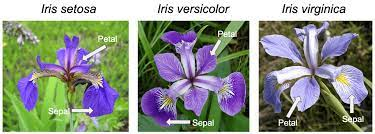


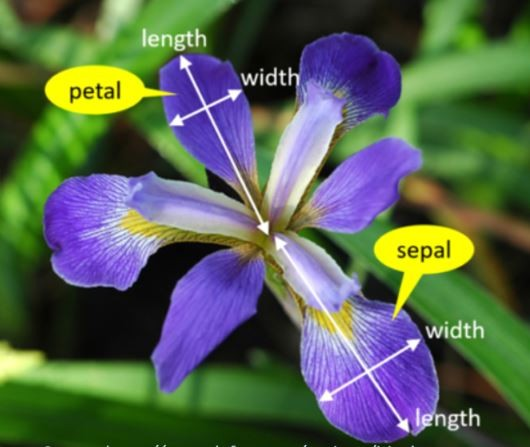

The Iris flower dataset is a classic dataset in the field of machine learning and statistical analysis. It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower. The dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper, “The use of multiple measurements in taxonomic problems.”

**The variables are:**

sepal_length: Sepal length, in centimeters, used as input.

sepal_width: Sepal width, in centimeters, used as input.

petal_length: Petal length, in centimeters, used as input.

petal_width: Petal width, in centimeters, used as input.

class: Iris Setosa, Versicolor, or Virginica, used as the target.

<h2> 1. LOADING THE IRIS DATASET </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# showing all columns
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_iris
iris_data = load_iris()

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# feature names (variable names)
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
iris_df['Iris type'] = iris_data['target']
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris type          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
iris_df.head(150)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [18]:

iris_df_no_target = iris_df.drop(columns=['Iris type'])

# Display summary statistics without the last column
iris_df_no_target.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df_no_target.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
Iris name                                                                   
sentosa                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
Iris name                                                                   
sentosa                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
Iris name                                                              
sentosa                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

<h2> 4. Basic preprocessing on Iris dataset</h2>
<h3> Few preprocessing operations are as follows: </h3>
<ol>
<li> Standardize the features using Z-score normalization. </li>
<li> Scale the features between 0 and 1 using Min-Max scaling. </li>
<li> Label encode the categorical labels. </li>
<li> Perform one-hot encoding on the label-encoded labels. </li>
<li> Split the dataset into training and testing sets. </li>
</ol>

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Step 1: Standardize the features using Z-score normalization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Min-Max scaling of features
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Step 3: Label Encoding for categorical labels (e.g., Iris species)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: One-Hot Encoding for categorical labels
onehot_encoder = OneHotEncoder(categories='auto')
y_onehot_encoded = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Print results
print("Original Features:")
print(X[:5])

print("\nStandardized Features:")
print(X_standardized[:5])

print("\nMin-Max Scaled Features:")
print(X_minmax_scaled[:5])

print("\nOriginal Labels:")
print(y[:5])

print("\nLabel Encoded Labels:")
print(y_encoded[:5])

print("\nOne-Hot Encoded Labels:")
print(y_onehot_encoded[:5])

print("\nShape of Training and Testing Sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Standardized Features:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Min-Max Scaled Features:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

Original Labels:
[0 0 0 0 0]

Label Encoded Labels:
[0 0 0 0 0]

One-Hot Encoded Labels:
  (np.int32(0), np.int32(0))	1.0
  (np.int32(1), np.int32(0))	1.0
  (np.int32(2), np.int32(0))	1.0
  (np.int32(3), np.int32(0))	1.0
  (np.int32(4), np.int32(0))	1.0

Shape of Training and Testing Sets:
X_train shape: (120, 4)
X_test shape: (30, 4)
y_tra

<h2> 5. Building the KNN classifier model </h2>

Model Evaluation:
Accuracy: 0.98


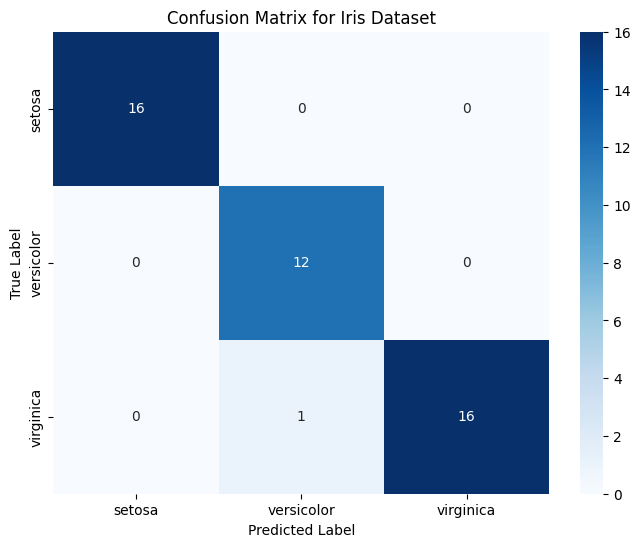


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
# Load Iris dataset
iris_data = load_iris()

X = iris_data.data  # Features
y = iris_data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Standardize the features using Z-score normalization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')
knn_model.fit(X_train_standardized, y_train)

# Predict the labels for the testing set
y_pred = knn_model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred) # Explain precision recall etc

# Print evaluation metrics
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.title('Confusion Matrix for Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\nClassification Report:")
print(class_report)

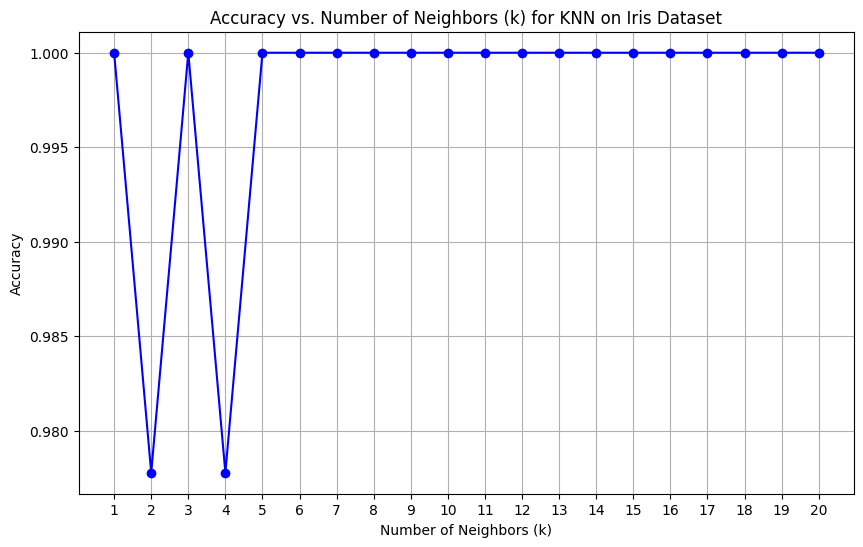

In [114]:
# accuracy vs K plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69420)

# Initialize variables for plotting
k_values = np.arange(1, 21)  # Test k values from 1 to 20
accuracy_values = []

# Iterate through different values of k
for k in k_values:
    # Train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for KNN on Iris Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

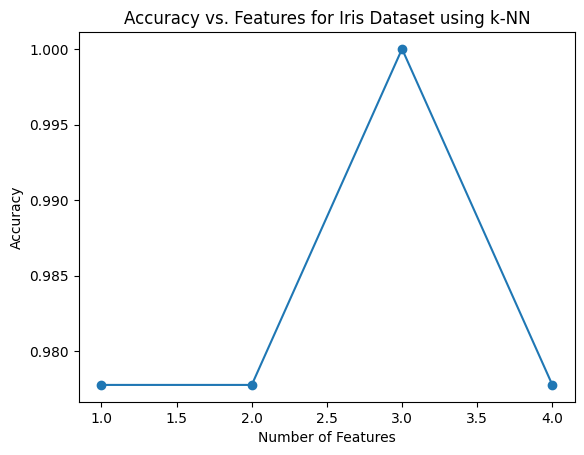

In [73]:
# accuracy vs features plot by removing one by one features for example 1st set is (sepal length, sepal width, petal length, petal width), 2nd set is (sepal length, sepal width,
# ,petal length) like this it goes on till only one feature left.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize lists to store results
num_features = X.shape[1]
accuracy_list = []

# Iterate through features
for i in range(num_features, 0, -1):
    # Remove i-th feature
    reduced_X = np.delete(X, i-1, axis=1)

    # Split the reduced dataset
    X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_X, y, test_size=0.3, random_state=42)

    # Fit k-NN model on reduced dataset
    knn.fit(X_train_reduced, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_reduced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy in the list
    accuracy_list.append(accuracy)

# Plotting the accuracy vs. features
plt.plot(range(1, num_features + 1), accuracy_list, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Features for Iris Dataset using k-NN')
plt.show()

<h3> References: </h3>
<ol>
<li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" class="wikilink">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</a> </li>
<li> <a href="https://scikit-learn.org/stable/modules/preprocessing.html" class="wikilink">https://scikit-learn.org/stable/modules/preprocessing.html</a> </li>
</ol>    

<h3> Exercises : </h3>
<ol>
   <li> Load the diabetes dataset (available in sklearn.datasets) and use the preprocessing steps to standardize the data and provide intuition the relation of features using various preprocessing modules as per your choice. </li>    
  <li> Apply the KNN classifier on the diabetes dataset with k= 2,3,5,6 and 7 values and evaluate the model based on the dataset's standardized features. </li>
    </ol>
    

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler


diabetes = load_diabetes(scaled=False)

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# convert the sex values in the df from [1, 2] to [0, 1]
sex_codes = {1: 0, 2: 1}
df['sex'] = df['sex'].map(sex_codes)

df['target'] = diabetes.target
df['target'] = df['target']

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,1,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,1,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [101]:
!pip install dabl
import dabl

   ---------------------------------------- 0.0/558.3 kB ? eta -:--:--
   ---------------------------------------- 558.3/558.3 kB 4.8 MB/s eta 0:00:00


Target looks like regression


c:\Users\Uday Om\AppData\Local\Programs\Python\Python39\lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='target', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=5.89E-01'}, xlabel='s5', ylabel='target'>,
         <Axes: title={'center': 'F=5.61E-01'}, xlabel='bmi'>,
         <Axes: title={'center': 'F=4.49E-01'}, xlabel='s4'>],
        [<Axes: title={'center': 'F=4.16E-01'}, xlabel='bp', ylabel='target'>,
         <Axes: title={'center': 'F=-4.10E-01'}, xlabel='s3'>,
         <Axes: title={'center': 'F=3.51E-01'}, xlabel='s6'>],
        [<Axes: title={'center': 'F=2.32E-01'}, xlabel='s1', ylabel='target'>,
         <Axes: title={'center': 'F=1.98E-01'}, xlabel='age'>,
         <Axes: title={'center': 'F=1.96E-01'}, xlabel='s2'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=2.02E-02'}, xlabel='target', ylabel='sex'>]],
       dtype=object)]

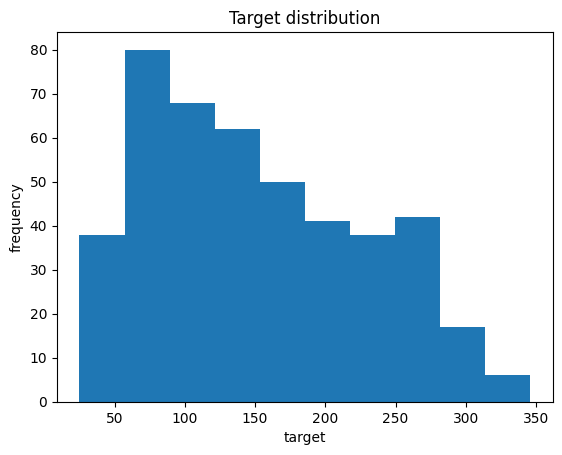

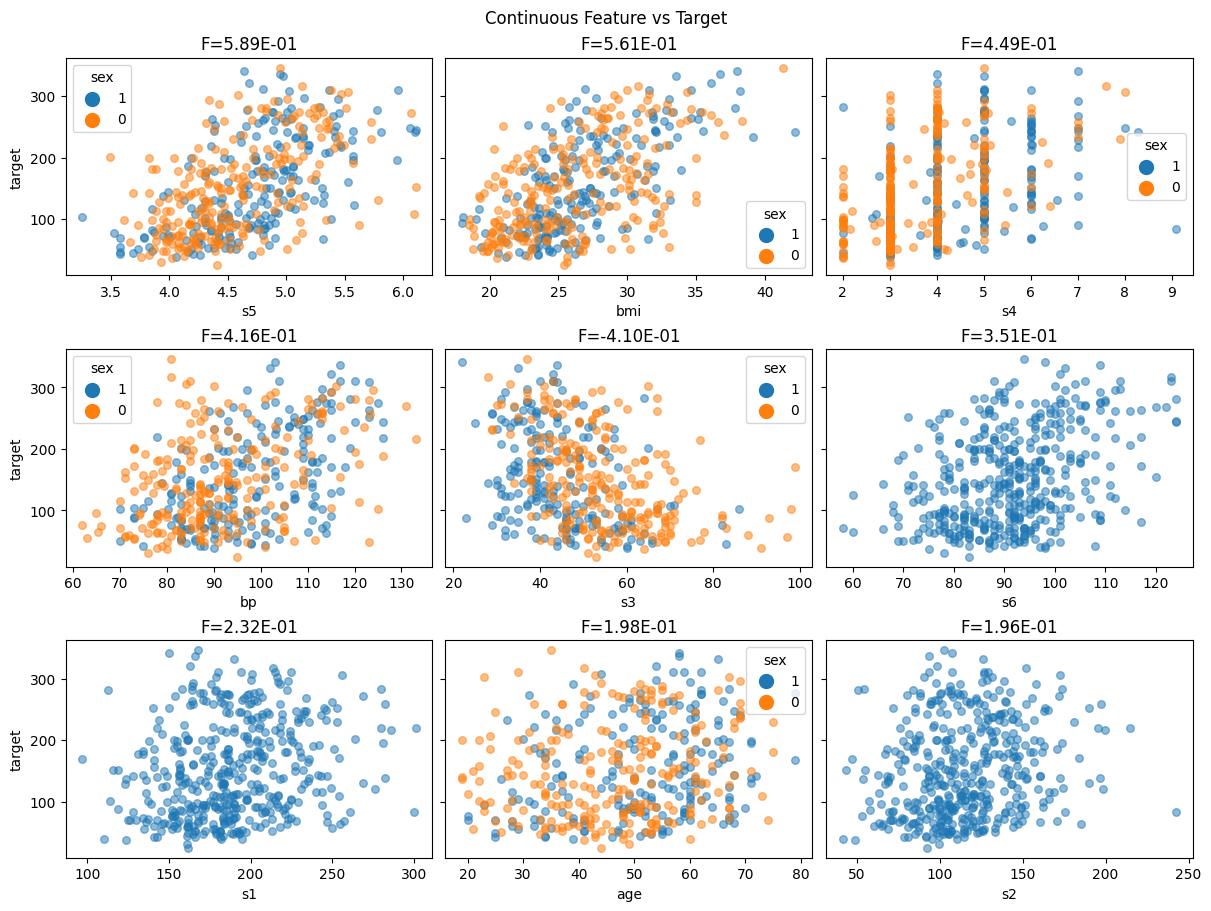

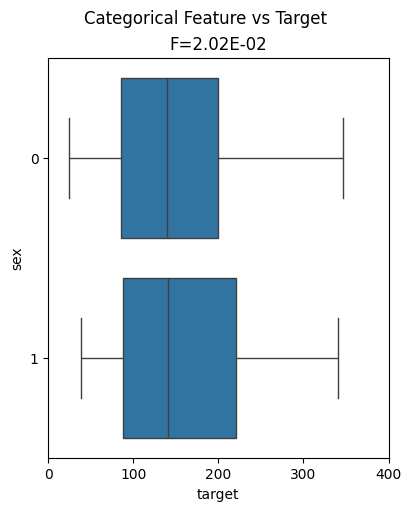

In [105]:
dabl.plot(df, target_col='target')

In [106]:
len(df['target'].unique())

214

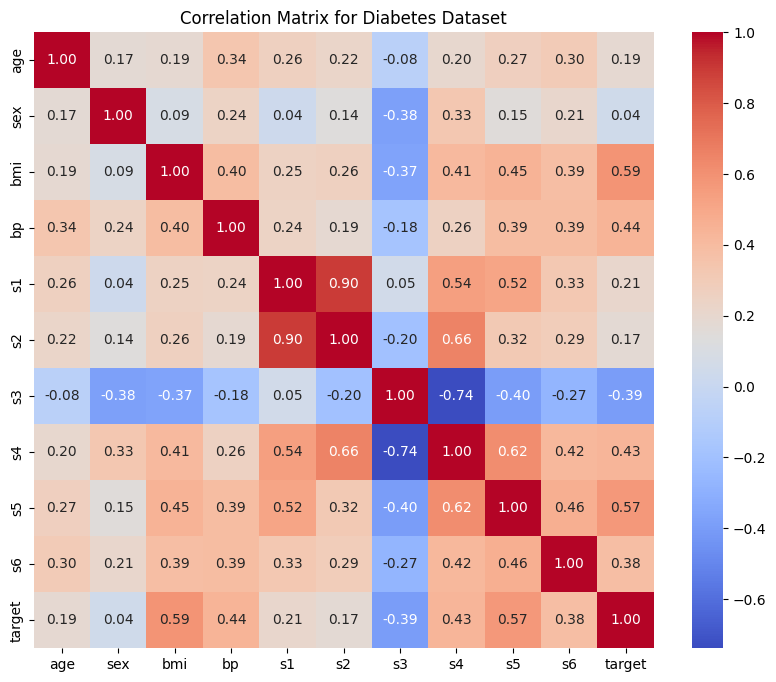

In [107]:
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()


In [122]:
scaler = StandardScaler()

X = scaler.fit_transform(df.drop(columns=['target']))

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

X_train.shape, X_test.shape

((353, 10), (89, 10))

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for k in [2, 3, 5, 6, 20]:
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = (mean_squared_error(y_test, y_pred))**0.5

    print(f"Root Mean Squared Error for k = {k} is: {mse:.2f}")

Root Mean Squared Error for k = 2 is: 53.36
Root Mean Squared Error for k = 3 is: 53.04
Root Mean Squared Error for k = 5 is: 50.82
Root Mean Squared Error for k = 6 is: 50.69
Root Mean Squared Error for k = 20 is: 51.46


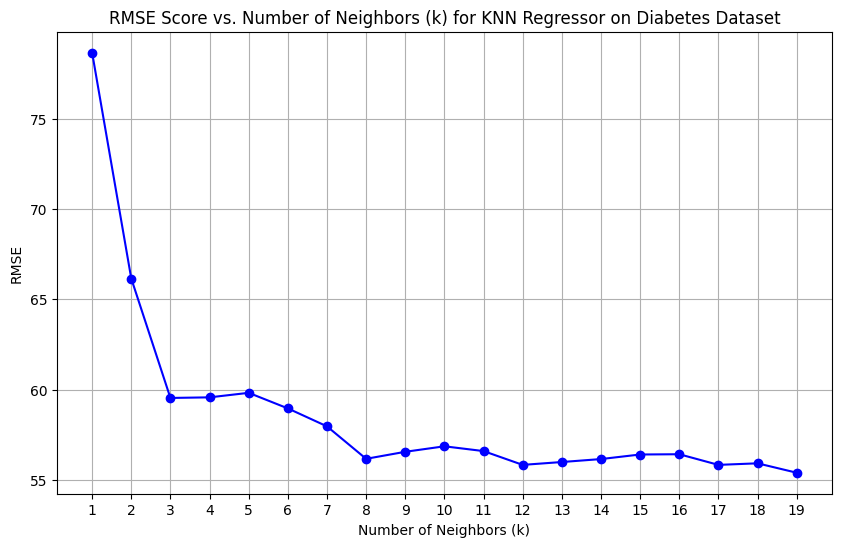

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load Iris dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69420)

# Initialize variables for plotting
k_values = np.arange(1, 20)  # Test k values from 1 to 20
r2_values = []

# Iterate through different values of k
for k in k_values:
    # Train the KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_regressor.predict(X_test)

    # Calculate R² score and store it
    r2 = mean_squared_error(y_test, y_pred)**0.5
    r2_values.append(r2)

# Plot R² score vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_values, marker='o', linestyle='-', color='b')
plt.title('RMSE Score vs. Number of Neighbors (k) for KNN Regressor on Diabetes Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()


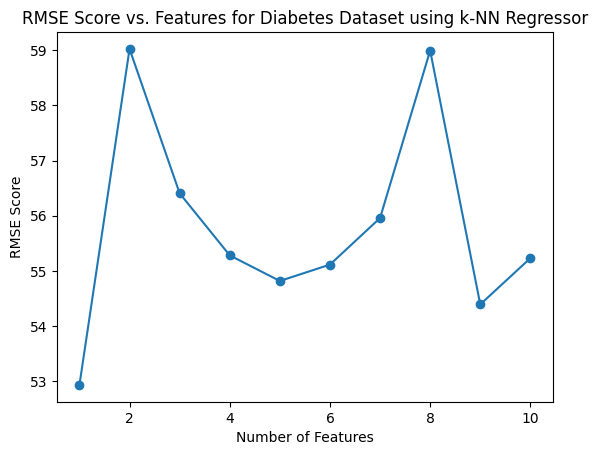

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize k-NN regressor
knn = KNeighborsRegressor(n_neighbors=8)

# Initialize lists to store results
num_features = X.shape[1]
r2_list = []

# Iterate through features
for i in range(num_features, 0, -1):
    # Remove i-th feature
    reduced_X = np.delete(X, i-1, axis=1)

    # Split the reduced dataset
    X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_X, y, test_size=0.3, random_state=42)

    # Fit k-NN model on reduced dataset
    knn.fit(X_train_reduced, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_reduced)

    # Calculate R² score
    r2 = mean_squared_error(y_test, y_pred)**0.5

    # Store R² score in the list
    r2_list.append(r2)

# Plotting the R² score vs. features
plt.plot(range(1, num_features + 1), r2_list, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('RMSE Score')
plt.title('RMSE Score vs. Features for Diabetes Dataset using k-NN Regressor')
plt.show()
